In [1]:
import tensorflow as tf
import pandas as pd

import array 
import sklearn
from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt

FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
ext = ".jpg"

RunFolder = "03Feb2019"
FV_count = 100

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [3]:
# load json and create model
from keras.models import model_from_json
json_file = open(FilePath  + "Runs/" + RunFolder + "/ModelsAndWeights/Predict_DNN_100FVfromResnet_8Class.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/Predict_DNN_100FVfromResnet_8Class.h5")
print("Loaded model from disk")
loaded_model.summary()

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                2828      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 232       
Total params: 3,060
Trainable params: 3,060
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [4]:
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV100_fromResnet/Fixation_WeightedSum_Combined_Csv/Test_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Test_Label.csv", header=None)
Y_testtemp = dataframe.values
Y_test = Y_testtemp[:,0]
X_test.shape

(48, 100)

In [5]:
predictions = loaded_model.predict(X_test)

In [6]:
#print("Predicted Labels")
y_pred = [0] * len(Y_test)
for i in range (len(Y_test)):
    a=list(predictions[i])
    y_pred[i]= a.index(max(a))
   #print(a.index(max(a)),end=" ")

In [7]:
#print("Actual Labels")
#for i in range (len(Y_test)):
   # print(int(Y_test[i]),end=" ")

In [8]:
cm = confusion_matrix(Y_test, y_pred)
print("")
print(cm)


[[4 0 0 0 0 1 1 0]
 [0 3 1 0 0 1 1 0]
 [1 1 3 0 0 0 1 0]
 [0 0 1 2 3 0 0 0]
 [0 0 1 0 3 2 0 0]
 [0 0 1 0 2 3 0 0]
 [0 0 2 0 0 0 4 0]
 [0 0 0 1 0 0 0 5]]


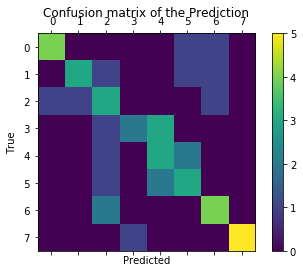

In [9]:
labels = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5',' 6', ' 7']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Prediction')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels( [''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
print ('\n Summary for each class:')
print (sklearn.metrics.classification_report(Y_test, y_pred))


 Summary for each class:
             precision    recall  f1-score   support

          0       0.80      0.67      0.73         6
          1       0.75      0.50      0.60         6
          2       0.33      0.50      0.40         6
          3       0.67      0.33      0.44         6
          4       0.38      0.50      0.43         6
          5       0.43      0.50      0.46         6
          6       0.57      0.67      0.62         6
          7       1.00      0.83      0.91         6

avg / total       0.62      0.56      0.57        48

